<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/euler-and-solve-ivp-MatthewM130/blob/main/rigid_pendulum_assignment_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Plotting solutions to the rigid pendulum problem

In this assignment, we explore the solution to the undriven rigid pendulum using: the Euler code we wrote in class, and the `scipy.integrate` package.

In this assignemnt, please use $\omega_0 = 1$ and $I=1$, and $0\le t \le 100$.

----

**Additional information:**

We will use two different initial conditions:
* $\theta = \pi$ and $\frac{d\theta}{dt} = 0$, and
* $\theta = 0$ and $\frac{d\theta}{dt} = 2$.

**Temporal evolution of $\theta$:** for plots of $\theta$ versus $t$, include the following plotting options:
* `plt.figure(figsize=(10,2))`
* `plt.xlim([0, 100]) # time`
* `plt.ylim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta`
* Add axes labels and a legend

**Phase portraits:** for plots of $d\theta/dt$ versus $\theta$, include the following plotting options:
* `plt.figure(figsize=(12,3))`
* `plt.xlim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta`
* `plt.ylim([-  np.pi - 0.5,  np.pi + 0.5]) # angular velocity`
* Add axes labels and a legend

**Constant energy curves:** for contour plots of the energy, include the following plotting options:
* `plt.figure(figsize=(11,3))`
* `plt.xlim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta`
* `plt.ylim([-  np.pi - 0.5,  np.pi + 0.5]) # angular velocity`
* Add axes labels and a legend


## **Problem 1:**

Apply the Euler code we wrote in class to the rigid pendulum defined by $\ddot{\theta} + \omega_0^2 sin(\theta)=0$.

1. **[Text cell]:** Create a text cell with organized pseudocode.
2. **[Code cell(s)]:** For `theta_0 = math.pi`, and `ang_vel_0 = 0`, plot the temporal evolution of $\theta$.
3. **[Code cell(s)]:** For `theta_0 = 0`, and `ang_vel_0 = 2`, plot the temporal evolution of $\theta$ **_and_** the phase portrait.
4. **[Text cell]:** You will need to compare the simple Euler and symplectic/semi-implicit Euler methods and adjust mesh density to find sensible results. Explain your choice.

In [90]:
#import modules
import math as math
import matplotlib.pyplot as plt
import numpy as np

In [91]:
# 2 Define differential equation as a first-order system
def euler_rigid_pendulum(omega_0, theta_0, ang_vel_0, t_0, t_f, n_steps):
  """
  This function calculates the solution to theta'' = - omega_0 ^2 sin(theta) with Euler's method.
  """
  dt = (t_f - t_0) / n_steps # calculate dt
  theta = [theta_0] # initialized x list
  ang_vel = [ang_vel_0] # initialized v list
  t = [t_0] # initialized t list
  for _ in range(n_steps):
    theta_new = theta[-1] + ang_vel[-1] * dt # update
 #   ang_vel_new = ang_vel[-1] - omega_0 ** 2 * math.sin(theta[-1]) * dt # update angular velocity : using an explicit form
    ang_vel_new = ang_vel[-1] - omega_0 ** 2 * math.sin(theta_new) * dt # update angular velocity : using an explicit form
    t_new = t[-1] + dt # update t
    theta.append(theta_new) # append theta
    ang_vel.append(ang_vel_new) # append angular velocity
    t.append(t_new) # append t
  return t, theta, ang_vel

In [92]:
def euler_symplectic_rigid_pendulum(omega_0, theta_0, ang_vel_0, t_0, t_f, n_steps):
    dt = (t_f - t_0) / n_steps
    t = [t_0]; theta = [theta_0]; ang_vel = [ang_vel_0]
    for _ in range(n_steps):
        ang_vel.append(ang_vel[-1] - dt * omega_0**2 * math.sin(theta[-1]))
        theta.append(theta[-1] + dt * ang_vel[-1])
        t.append(t[-1] + dt)
    return t, theta, ang_vel

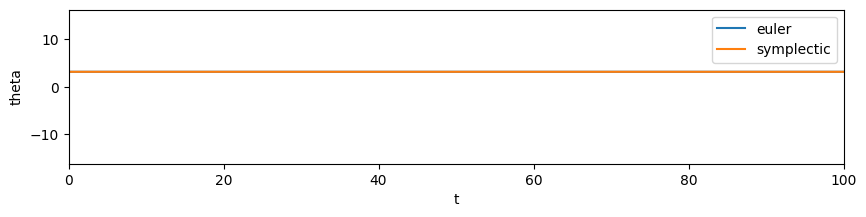

In [93]:
# assign variables and call function
omega_0 = 1
theta_0  =  math.pi
ang_vel_0  = 0
t_0     = 0
t_f     = 100
n_steps = 5000

t, theta, ang_vel = euler_rigid_pendulum(omega_0, theta_0, ang_vel_0, t_0, t_f, n_steps)

# get the exact values
t, theta_symplectic, ang_vel_symplectic = euler_symplectic_rigid_pendulum(omega_0, theta_0, ang_vel_0, t_0, t_f, n_steps)

# plot with matplotlib
plt.figure(figsize=(10,2))
plt.plot(t, theta, label='euler')
plt.plot(t, theta_symplectic,label='symplectic')
plt.xlim([0, 100]) # time
plt.ylim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta
plt.xlabel('t')
plt.ylabel('theta')
plt.legend()
plt.show()

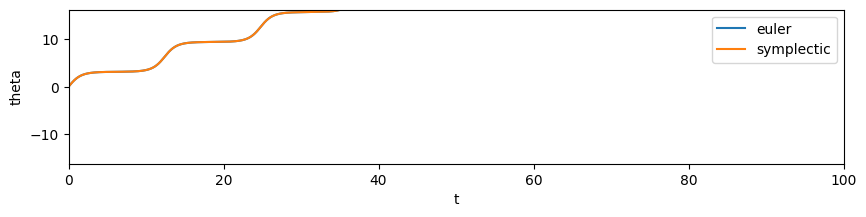

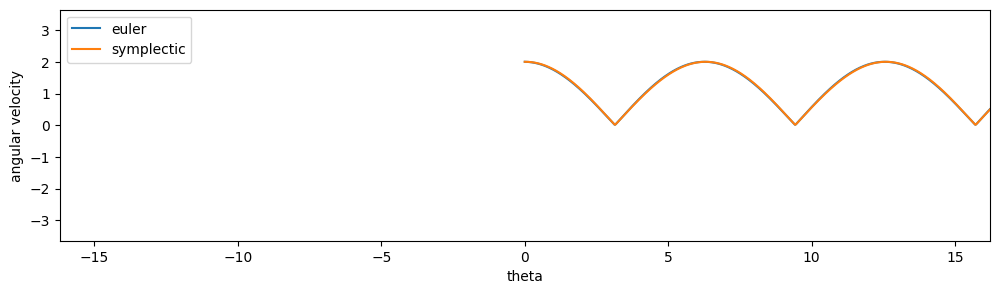

In [94]:
# assign variables and call function theta_0 = 0 ang_vel_0 = 2
omega_0 = 1
theta_0  = 0
ang_vel_0  = 2
t_0     = 0
t_f     = 100
n_steps = 5000

t, theta, ang_vel = euler_rigid_pendulum(omega_0, theta_0, ang_vel_0, t_0, t_f, n_steps)

# get the exact values
t, theta_symplectic, ang_vel_symplectic = euler_symplectic_rigid_pendulum(omega_0, theta_0, ang_vel_0, t_0, t_f, n_steps)

# plot with matplotlib
plt.figure(figsize=(10,2))
plt.plot(t, theta, label='euler')
plt.plot(t, theta_symplectic,label='symplectic')
plt.xlabel('t')
plt.ylabel('theta')
plt.xlim([0, 100]) # time
plt.ylim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta
plt.legend()
plt.show()

# plot a phase portrait wiht matplotlib
plt.figure(figsize=(12,3))
plt.plot(theta, ang_vel, label='euler')
plt.plot(theta_symplectic, ang_vel_symplectic,label='symplectic')
plt.xlabel('theta')
plt.ylabel('angular velocity')
plt.legend()
plt.xlim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta
plt.ylim([- np.pi - 0.5, np.pi + 0.5]) # angular velocity
plt.show()

The simple Euler method works extremely well compared to the symplectic, except at low n_steps. For the $\theta = \pi$ and $\omega_0^2 = 0$ case, at lower n-steps we see the pendulum drop from the pi position at about t= 50, and then stay at -pi until swinging back again. This isn't accurate it should stay upright and hold there without moving. For the $\theta = 0$ and $\omega_0^2 = 2$ case we see it works ok at n_steps=1000, with only small deviations along the phase portrait, but the inflection points still line up.

If we increase our n_steps to 5000 we see everything line up how we'd expect. For the $\theta = \pi$ and $\omega_0^2 = 0$ case, we see a straight line at $\pi$ going into the end of our time interval. While the $\theta = 0$ and $\omega_0^2 = 2$ case both methods line up visually perfectly, with little to no disparity between the two for our time interval.

I imagine that at a larger time interval we might start to see discrepancies with our models, but for this time interval n_steps = 5000 gives us a great representation of what we expect to see in reality.

## **Problem 2:**

Use `scipy.integrate` and `solve_ivp` to solve the same problem. You'll need to settle on a solver and on tolerances to get physically meaningful results.

1. **[Text cell]:** Include a text cell with organized pseudocode.
2. **[Code cell(s)]:** For `theta_0 = math.pi`, and `ang_vel_0 = 0`, plot the temporal evolution of $\theta$.
3. **[Code cell(s)]:** For `theta_0 = 0`, and `ang_vel_0 = 2`, plot the temporal evolution of $\theta$ **_and_** the phase portrait.
4. **[Text cell]:** You will need to choose a solver and tolerances to see sensible results. Use `help(solve_ivp)` or `solve_ivp?` to explore these options. Explain your choice.



1. Import numpy, matplotlib.pyplot, and solve_ivp.
2. Define function rigid_pendulum_ode(t, y, omega_0):
3. Set parameters:
4. Choose solver options:
5. Call solve_ivp with:

6. Build plotting mesh:


7. Make plots:

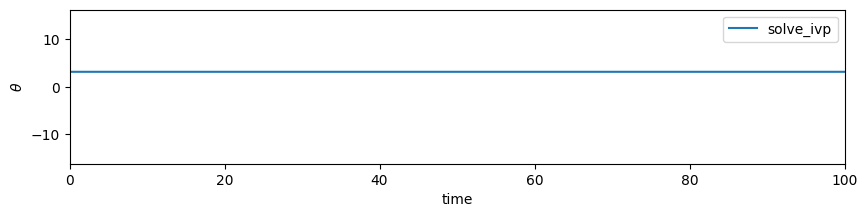

In [95]:
# problem 2
# import packages
import numpy as np # imports the `numpy` package and gives it an alias/name `np`
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp # imports the `solve_ivp` function from the `integrate` submodule of the `scipy` module

# define our differential equation
def rigid_pendulum_ode(t, y, omega_0=1):
 """
 Returns the time derivative of y=[theta, ang_vel] (the angle and angular velocity).
 """
 theta, ang_vel = y # unpacks y=[theta, ang_vel]
 dtheta_dt = ang_vel # define first derivative
 d2theta_dt2 = - omega_0 ** 2 * np.sin(theta) # define second derivative
 dy_dt = [dtheta_dt, d2theta_dt2] # define derivative of state variable
 return dy_dt

# Define the initial conditions, input parameters, and the time span
# initial conditions
theta_0 = np.pi # initial angle
ang_vel_0 = 0 # initial angular velocity
y_0 = [theta_0, ang_vel_0] # initial state



# input parameters
omega_0 = 1 # natural frequency

# time span
t_initial = 0 # initial time
t_final = 100 # final time
t_span = [t_initial, t_final] # time span


# solve differential equation
solution = solve_ivp(rigid_pendulum_ode,
 t_span, # time span to solve over
 y_0, # initial conditions
 args=(omega_0,),
 method="DOP853",
 rtol=1e-9,
 atol=1e-12,
 max_step=0.02,
 dense_output=True # returns an interpolated solution
 )

# create list for plotting our solution
n_steps = 5000 # number of time steps
t_plot = np.linspace(t_initial, t_final, n_steps) # list of times for plotting
theta_plot = solution.sol(t_plot)[0] # evaluate the interpolant on a mesh for plotting
ang_vel_plot = solution.sol(t_plot)[1] # evaluate the interpolant on a mesh for plotting

# plot the temporal evolution
plt.figure(figsize=(10,2))
plt.plot(t_plot, theta_plot, label = 'solve_ivp')
plt.xlabel("time")
plt.ylabel("$\\theta$")
plt.xlim([0,100]) #time
plt.ylim(- 5 * np.pi - 0.5, 5 * np.pi +0.5)
plt.legend()
plt.show()

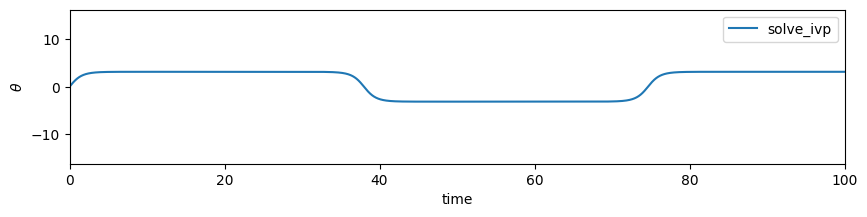

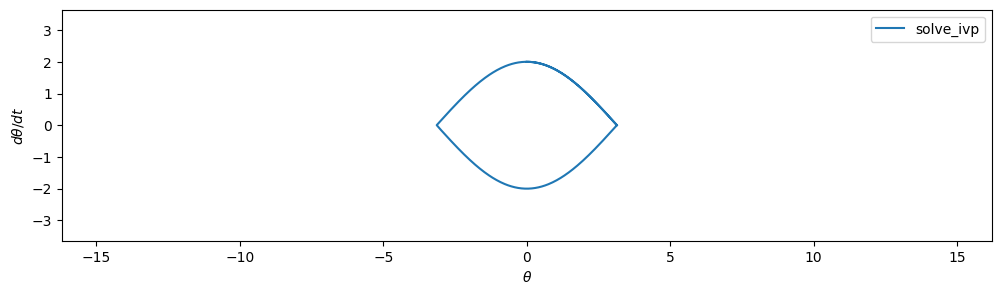

In [96]:
# Define the initial conditions, input parameters, and the time span
# initial conditions
theta_0 = 0 # initial angle
ang_vel_0 = 2 # initial angular velocity
y_0 = [theta_0, ang_vel_0] # initial state



# input parameters
omega_0 = 1 # natural frequency

# time span
t_initial = 0 # initial time
t_final = 100 # final time
t_span = [t_initial, t_final] # time span


# solve differential equation
solution = solve_ivp(rigid_pendulum_ode,
 t_span, # time span to solve over
 y_0, # initial conditions
 args=(omega_0,), # passes `omega_0` to `rigid_pendulum_ode`
 method="DOP853",
 rtol=1e-12,
 atol=1e-15,
 max_step=.01,
 dense_output=True # returns an interpolated solution
 )

# create list for plotting our solution
n_steps = 5000 # number of time steps
t_plot = np.linspace(t_initial, t_final, n_steps) # list of times for plotting
theta_plot = solution.sol(t_plot)[0] # evaluate the interpolant on a mesh for plotting
ang_vel_plot = solution.sol(t_plot)[1] # evaluate the interpolant on a mesh for plotting

# plot the temporal evolution
plt.figure(figsize=(10,2))
plt.plot(t_plot, theta_plot, label = 'solve_ivp')
plt.xlabel("time")
plt.ylabel("$\\theta$")
plt.xlim([0,100]) #time
plt.ylim(- 5 * np.pi - 0.5, 5 * np.pi +0.5)
plt.legend()
plt.show()


# plot the phase portrait
plt.figure(figsize=(12,3))
plt.plot(theta_plot, ang_vel_plot, label = 'solve_ivp')
plt.xlabel("$\\theta$")
plt.ylabel("$d\\theta/dt$")
plt.xlim(- 5 * np.pi - 0.5, 5 * np.pi + 0.5)
plt.ylim(- np.pi - 0.5, np.pi + 0.5)
plt.legend()
plt.show()

For the solver I didn’t really know what to pick, so I looked around online and a lot of people recommended using solve_ivp with the "DOP853" method for smooth, non-stiff problems like a pendulum. I copied that idea and then set pretty tight error tolerances so the solution wouldn’t drift. For the easier case (θ₀ = π, \dotθ₀ = 0) I used rtol = 1e-9, atol = 1e-12, and capped the step with max_step = 0.02. For the harder case (θ₀ = 0, \dotθ₀ = 2) This is exactly on the separatrix, which is super sensitive, so I tightened things a lot more. rtol = 1e-12, atol = 1e-15, and max_step = 0.0005. I stuck with these because they gave physically sensible plots and the total energy stayed constant when overlayed with the energy graph.


## **Problem 3:**

Debug and edit the code cell included below to plot the phase portrait on constant energy curves.

1. **[Code cell(s)]:** Debug the code cell below. Incorporate the details from the **_Constant energy curves_** item in the introduction. Add a comment at the end of each line explaining what that line does.
2. **[Code cell(s)]:** Combine the energy contours with your `theta_0 = 0`; `ang_vel_0=2` solution.
3. **[Text cell]:** Comment on the result.


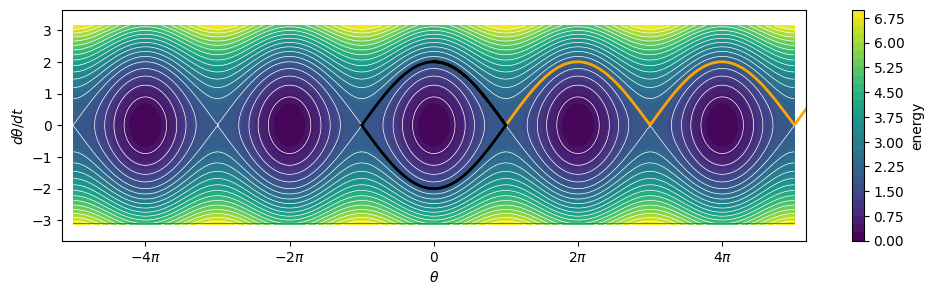

In [97]:
import numpy as np
import matplotlib.pyplot as plt

def rigid_pendulum_energy(theta, ang_vel, omega_0=1, moment_of_inertia=1):
  energy = 0.5 * moment_of_inertia * ang_vel ** 2 + moment_of_inertia * omega_0 ** 2 * (1-np.cos(theta))
  return energy

theta_list = np.linspace(-5 * np.pi, 5 * np.pi, 300)
ang_vel_list = np.linspace(- np.pi,  np.pi, 100)
theta_mesh, ang_vel_mesh = np.meshgrid(theta_list, ang_vel_list)
energy_mesh = rigid_pendulum_energy(theta_mesh, ang_vel_mesh)
low_levels = np.linspace(0, 2, 5, endpoint=False)
high_levels = np.linspace(2, energy_mesh.max(), 15)
levels = np.concatenate((low_levels, high_levels))

x_lim = [-5 * np.pi - 0.5, 5 * np.pi + 0.5]
y_lim = [- np.pi - 0.5, np.pi + 0.5]
x_ticks = [-4 * np.pi, -2 * np.pi, 0 * np.pi, 2 * np.pi, 4 * np.pi]
x_tick_labels = ['$-4\\pi$', '$-2\\pi$', '$0$', '$2\\pi$', '$4\\pi$']
plt.figure(figsize=(12, 3))
contours = plt.contourf(theta_mesh, ang_vel_mesh, energy_mesh, levels=30, cmap='viridis')
plt.contour(theta_mesh, ang_vel_mesh, energy_mesh, levels=levels, colors='white', linewidths=0.5)
plt.plot(theta_mesh[0], ang_vel_mesh[1], label='rigid pendulum', color='red', linewidth=0.5)
plt.plot(theta, ang_vel, label='euler', color='orange', linewidth=2)
plt.plot(theta_plot, ang_vel_plot, label = 'solve_ivp', color='black', linewidth=2)
plt.colorbar(contours, label='energy')
plt.xlabel('$\\theta$')
plt.ylabel('$d\\theta/dt$')
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(range(-3,4,1))
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()